# Notebook for analysis of engineering-colleges-in-india

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# reading the dataset
engg_colleges = pd.read_csv("indian_universities.csv")

In [ ]:
# getting the shape of the dataset
engg_colleges.shape

(5440, 15)

In [ ]:
engg_colleges.describe()

,Total Student Enrollments,Total Faculty,Established Year,Rating,Average Fees
count,4.437000e+03,5279.000000,5339.000000,327.000000,5.440000e+03
mean,1.915446e+03,96.739345,2000.425548,3.081896,1.886011e+05
std,1.841858e+04,113.869962,16.203044,0.305166,1.807647e+05
min,1.000000e+00,1.000000,1857.000000,2.010000,1.800000e+02
25%,4.090000e+02,37.000000,1998.000000,3.010000,9.000000e+04
50%,8.120000e+02,69.000000,2007.000000,3.100000,1.590000e+05
75%,1.551000e+03,124.000000,2009.000000,3.235000,2.400000e+05
max,1.035081e+06,2453.000000,2019.000000,3.830000,3.578597e+06


In [ ]:
# checking for null values
engg_colleges.isna().sum()

College Name                    0
Genders Accepted               18
Campus Size                  2751
Total Student Enrollments    1003
Total Faculty                 161
Established Year              101
Rating                       5113
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
Country                         0
College Type                    1
Average Fees                    0
dtype: int64

In [ ]:
# checking for data types of the columns
engg_colleges.dtypes

College Name                  object
Genders Accepted              object
Campus Size                   object
Total Student Enrollments    float64
Total Faculty                float64
Established Year             float64
Rating                       float64
University                    object
Courses                       object
Facilities                    object
City                          object
State                         object
Country                       object
College Type                  object
Average Fees                 float64
dtype: object

In [ ]:
engg_colleges.head()

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811.0,329.0,2007.0,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.000000
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071.0,192.0,2007.0,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759.0,101.0,2018.0,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.000000
3,Birla Institute of Technology,Co-Ed,980 Acres,4506.0,284.0,1955.0,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.046512
4,International Institute of Information Technology,Co-Ed,66 Acres,1721.0,85.0,2001.0,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.666667


## Performing column by column data analysis

### 1. College Name : Some of the Colleges are repeated. In our database we need to make sure that we are storing unique colleges

In [ ]:
# checking for null values
engg_colleges["College Name"].isna().sum()


0

In [ ]:
# getting the total number of colleges which are present
len(engg_colleges["College Name"])

5440

In [ ]:
# getting the total number of unique colleges which are present
len(set(engg_colleges["College Name"]))

4830

In [ ]:
# getting the count of repeated colleges 
college_count = {}

# storing the count of corresponding colleges in the dictionary
for college in list(engg_colleges["College Name"]):
    if college not in college_count.keys():
        college_count[college] = 1
    else: 
        college_count[college] += 1

# getting the list of repeated colleges
repeated_colleges = []

for key, value in college_count.items():
    if value > 1:
        repeated_colleges.append(key)

f"There are {len(repeated_colleges)} repeated colleges which are available in the dataset"

'There are 205 repeated colleges which are available in the dataset'

In [ ]:
# dropping the duplicate rows from the dataset
engg_colleges.drop_duplicates(subset=['College Name'], inplace=True)
engg_colleges.shape

(4830, 15)

### 2. Genders Accepted : This can be a new database table where in we will store the unique genders accepted. Tomorrow if any new type of gender gets added, then we can easily update this table and add the new gender

In [ ]:
# checking for null values
engg_colleges["Genders Accepted"].isna().sum()

17

In [ ]:
# getting the total number of unique genders which are present
set(engg_colleges["Genders Accepted"])

{'Co-Ed', 'Co-Ed5666656', 'Female', 'Male', nan}

In [ ]:
# replacing the Co-Ed5666656 by Co-Ed
engg_colleges["Genders Accepted"].replace("Co-Ed5666656", "Co-Ed", inplace=True)

In [ ]:
# getting the total number of unique genders which are present
# We can see that currently we have 4 types of genders in our dataset
set(engg_colleges["Genders Accepted"])

{'Co-Ed', 'Female', 'Male', nan}

In [ ]:
# update NaN value with Co-Ed
engg_colleges["Genders Accepted"] = engg_colleges["Genders Accepted"].fillna('Co-Ed')

<Axes: xlabel='Genders Accepted', ylabel='count'>

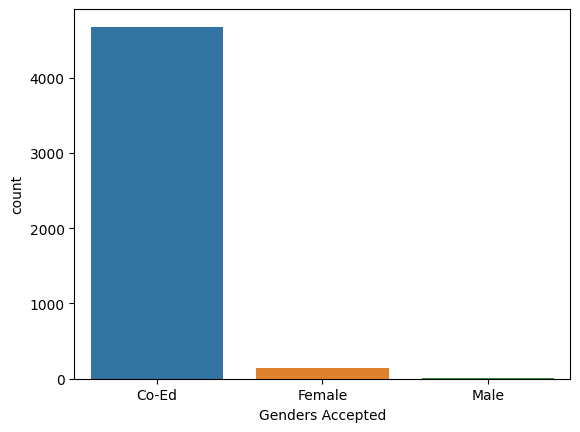

In [ ]:
# getting the count of different genders accepted}
sns.countplot(data=engg_colleges, x=engg_colleges["Genders Accepted"])

### 3. Campus Size : Need to clean the column by removing the word acre after every value and convert the same into numerical column

In [ ]:
# checking for null values
engg_colleges["Campus Size"].isna().sum()

2458

In [ ]:
# replacing Acres / Acre with blank string and stripping out the spaces
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.replace("Acres", "")
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.replace("Acre", "")
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.strip()

In [ ]:
# converting the data types of the Campus size to float
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].astype('float')

In [ ]:
# checking the data type for Campus Size
engg_colleges["Campus Size"].dtype

dtype('float64')

In [ ]:
# getting the overview of the data
engg_colleges["Campus Size"].describe()

count     2372.000000
mean        71.309865
std        358.368825
min          0.000000
25%         11.000000
50%         23.000000
75%         50.000000
max      16000.000000
Name: Campus Size, dtype: float64

### 4. Total Student Enrollments : This column is already clean and contains some null values

In [ ]:
# checking for null values
engg_colleges["Total Student Enrollments"].isna().sum()

903

In [ ]:
# checking the data type for Total Student Enrollments 
engg_colleges["Total Student Enrollments"].dtype

dtype('float64')

In [ ]:
# getting the overview of the data
engg_colleges["Total Student Enrollments"].describe()

count    3.927000e+03
mean     2.048035e+03
std      1.957238e+04
min      1.000000e+00
25%      4.150000e+02
50%      8.360000e+02
75%      1.610500e+03
max      1.035081e+06
Name: Total Student Enrollments, dtype: float64

### 5. Total Faculty : This column is already clean and contains some null values

In [ ]:
# checking for null values
engg_colleges["Total Faculty"].isna().sum()

143

In [ ]:
# checking the data type for Total Faculty
engg_colleges["Total Faculty"].dtype

dtype('float64')

In [ ]:
# getting the overview of the data
engg_colleges["Total Faculty"].describe()

count    4687.000000
mean      102.620226
std       118.255767
min         1.000000
25%        42.000000
50%        74.000000
75%       129.000000
max      2453.000000
Name: Total Faculty, dtype: float64

<Axes: xlabel='Total Faculty', ylabel='Count'>

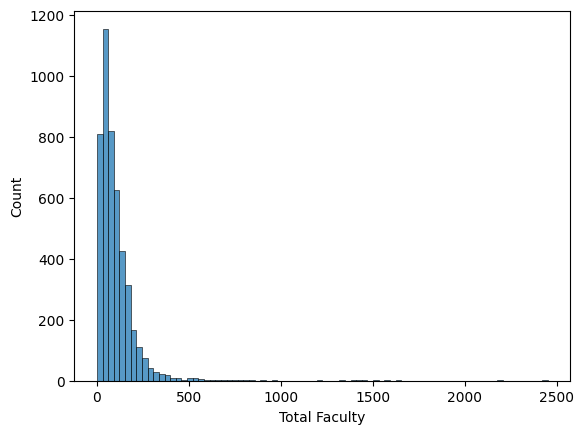

In [ ]:
sns.histplot(data=engg_colleges["Total Faculty"], bins=80)

### 6. Established Year: This column is already clean and contains some null values

In [ ]:
# checking for null values
engg_colleges["Established Year"].isna().sum()

95

In [ ]:
# checking the data type for Established Year
engg_colleges["Established Year"].dtype

dtype('float64')

In [ ]:
# getting the overview of the data
engg_colleges["Established Year"].describe()

count    4735.000000
mean     2000.954382
std        15.723504
min      1857.000000
25%      1999.000000
50%      2007.000000
75%      2009.000000
max      2019.000000
Name: Established Year, dtype: float64

<Axes: xlabel='Established Year', ylabel='Count'>

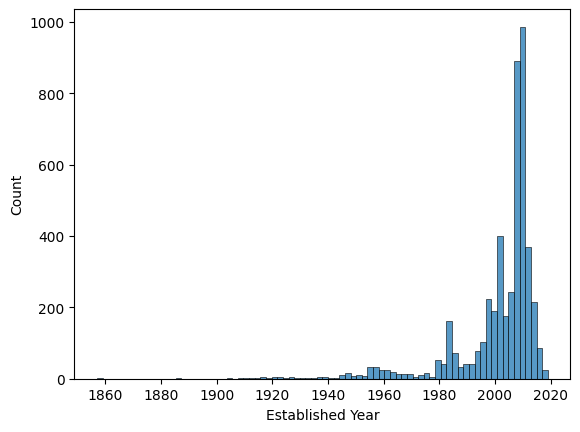

In [ ]:
sns.histplot(data=engg_colleges["Established Year"], bins=80)

### 7. Rating: This column has almost all null values and has required data type

In [ ]:
# checking for null values
engg_colleges["Rating"].isna().sum()

4510

In [ ]:
# checking the data type for Rating
engg_colleges["Rating"].dtype

dtype('float64')

<Axes: xlabel='Rating', ylabel='Rating'>

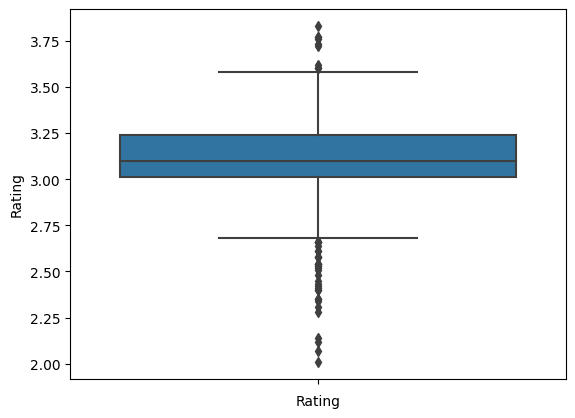

In [ ]:
plt.xlabel("Rating")
sns.boxplot(data=engg_colleges["Rating"], y=engg_colleges["Rating"])

### 8. University: This column can be normalized into a different table and contains some null values

In [ ]:
# checking for null values.
engg_colleges["University"].isna().sum()

1640

In [ ]:
# getting the count of unique universities
f"There are {len(set(list(engg_colleges['University'])))} unique universities present"

'There are 185 unique universities present'

In [ ]:
# getting the lenght of unique universities 
len(set(list(engg_colleges['University'])))

185

In [ ]:
engg_colleges.University.value_counts().iloc[1:10]

Dr APJ Abdul Kalam Technical University, Lucknow                261
Jawaharlal Nehru Technological University, Hyderabad            236
Jawaharlal Nehru Technological University, Kakinada             183
Rajiv Gandhi Proudyogiki Vishwavidyalaya, Bhopal                182
Gujarat Technological University, Ahmedabad                     163
Visvesvaraya Technological University, Belagavi                 163
Savitribai Phule Pune University, Pune                          123
APJ Abdul Kalam Technological University, Thiruvananthapuram    119
Jawaharlal Nehru Technological University, Anantapur            106
Name: University, dtype: int64

<Axes: xlabel='count', ylabel='University'>

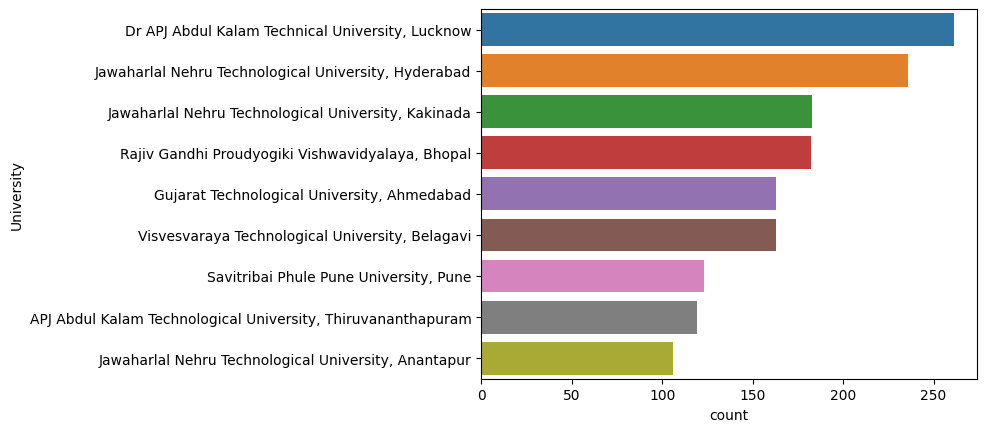

In [ ]:
# plotting the top 25 university counts
sns.countplot(data=engg_colleges, y=engg_colleges["University"], order=engg_colleges.University.value_counts().iloc[1:10].index)

### 9. Courses : This column contains comma separated values of all the courses that the specific university offers. This can be normalized into a different table and corresponding course values can be stored for specific college. 

In [ ]:
engg_colleges["Courses"].isna().sum()

0

In [ ]:
# splitting the comma separated courses 
courses = engg_colleges["Courses"].str.split(", ")

course_set = set()

# adding the unique courses in the course set.
for course_list in courses:
    for course in course_list:
        course_set.add(course)
        
len(course_set)

12043

### 10. Facilities : This column contains comma separated values of all the Facilities that a particular college offers. This can be normalized into a different table and the corresponding values can be stored for specific college. 

In [ ]:
# getting the count of null values
engg_colleges["Facilities"].isna().sum()

12

In [ ]:
# extracting the facilities for all the colleges
facilities = engg_colleges["Facilities"]

In [ ]:
facility_dict = {}

for college_facility in facilities:
    if type(college_facility) != str:
        continue
        
    facility_list = college_facility.split(", ")
    for facility in facility_list:
        if facility not in facility_dict.keys():
            facility_dict[facility] = 1
        else:
            facility_dict[facility] += 1

facility_dict

{'Boys Hostel': 3738,
 'Girls Hostel': 3805,
 'Gym': 2594,
 'Library': 4798,
 'Sports': 4365,
 'Cafeteria': 3887,
 'Medical/Hospital': 3238,
 'Wifi': 2190,
 'IT Infrastructure': 4739,
 'Laboratories': 4232,
 'Swimming Pool': 182,
 'Convenience Store': 688,
 'Alumni Associations': 2408,
 'Guest Room': 1758,
 'Banks Facilities': 1134,
 'Auditorium': 3321,
 'Transport': 3108,
 'Classrooms': 354,
 'Parking Facility': 343,
 'Moot Court': 16}

In [ ]:
# sorting the facility dictionary
sorted_facility_list = sorted(facility_dict.items(), key=lambda x:x[1], reverse=True)

# extracting the keys and values
keys = [x[0] for x in sorted_facility_list]
values = [x[1] for x in sorted_facility_list]

<Axes: >

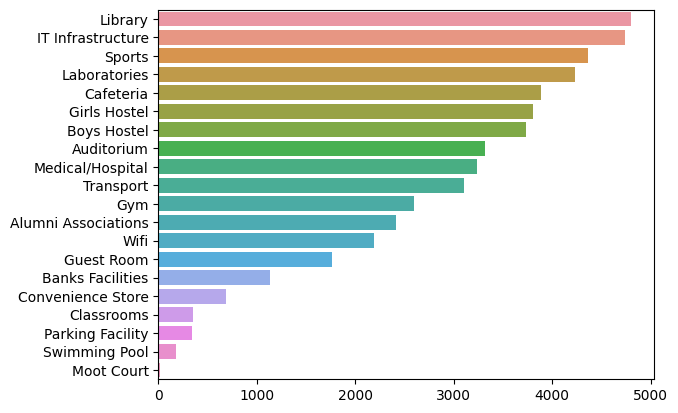

In [ ]:
# drawing the bar plot
sns.barplot(x=values, y=keys)

### 11. City : This column contains city values for the corresponding colleges, and can be normalized into a different table.  

In [ ]:
# checking for null values
engg_colleges["City"].isna().sum()

0

In [ ]:
# getting the count of unique cities
f"There are {len(set(list(engg_colleges['City'])))} unique cities present"

'There are 2137 unique cities present'

In [ ]:
# getting the list of unique cities
len(set(list(engg_colleges['City'])))

2137

<Axes: xlabel='count', ylabel='City'>

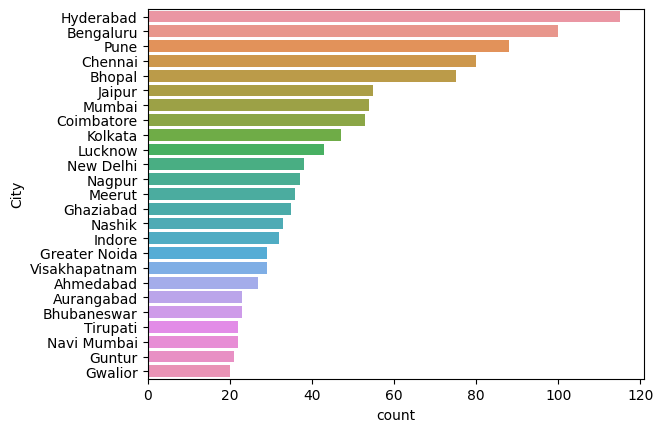

In [ ]:
# Getting the top 25 cities containing most universities
sns.countplot(data=engg_colleges, y=engg_colleges["City"], order=engg_colleges.City.value_counts().iloc[:25].index)

### 12. State : This column contains state values for the corresponding colleges, and can be normalized into a different table.

In [ ]:
# checking for null values
engg_colleges["State"].isna().sum()

0

In [ ]:
# getting the count of unique cities
f"There are {len(set(list(engg_colleges['State'])))} unique states present"

'There are 34 unique states present'

In [ ]:
# getting the list of unique States
set(list(engg_colleges['State']))

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

<Axes: xlabel='count', ylabel='State'>

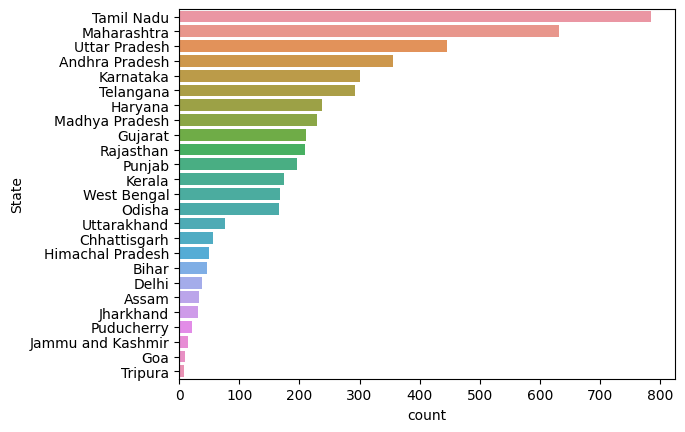

In [ ]:
# top 25 states containing most universities
sns.countplot(data=engg_colleges, y=engg_colleges["State"], order=engg_colleges.State.value_counts().iloc[:25].index)

### 13. Country : This column contains only 1 value i.e India. We can create a new table to scale up the system and accomodate new countries

In [ ]:
# checking for null values
engg_colleges["Country"].isna().sum()

0

In [ ]:
# getting the count of unique country
f"There is {len(set(list(engg_colleges['Country'])))} unique country present"

'There is 1 unique country present'

In [ ]:
# getting the list of unique Country
set(list(engg_colleges['Country']))

{'India'}

### 14. College Type : This column contains different college types and can be normalized to create a new table

In [ ]:
# checking for null values
engg_colleges["College Type"].isna().sum()

1

In [ ]:
# getting the count of unique college types
f"There are {len(set(list(engg_colleges['College Type'])))} unique college types present"

'There are 3 unique college types present'

In [ ]:
# getting the list of unique college types
set(list(engg_colleges['College Type']))

{'Private', 'Public/Government', nan}

<Axes: xlabel='College Type', ylabel='count'>

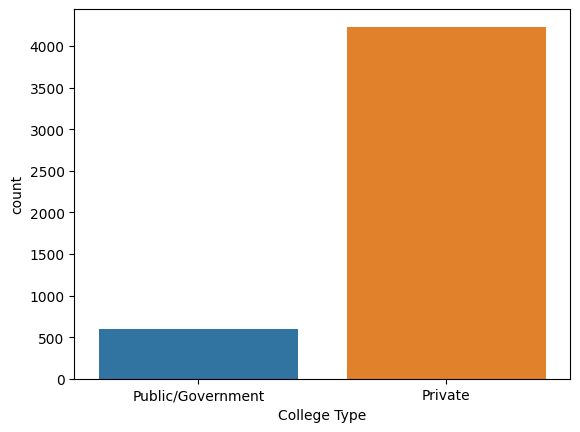

In [ ]:
# count plot for colleges
sns.countplot(data=engg_colleges, x=engg_colleges["College Type"])

### 15. Average Fees : This column contains average fees for the colleges.

In [ ]:
# checking for null values
engg_colleges["Average Fees"].isna().sum()

0

In [ ]:
# getting the overview of the data
engg_colleges["Average Fees"].dtype

dtype('float64')

In [ ]:
engg_colleges["Average Fees"].describe()

count    4.830000e+03
mean     1.945764e+05
std      1.778316e+05
min      3.000000e+02
25%      9.945854e+04
50%      1.600000e+05
75%      2.452497e+05
max      3.578597e+06
Name: Average Fees, dtype: float64

<Axes: xlabel='Average Fees', ylabel='Count'>

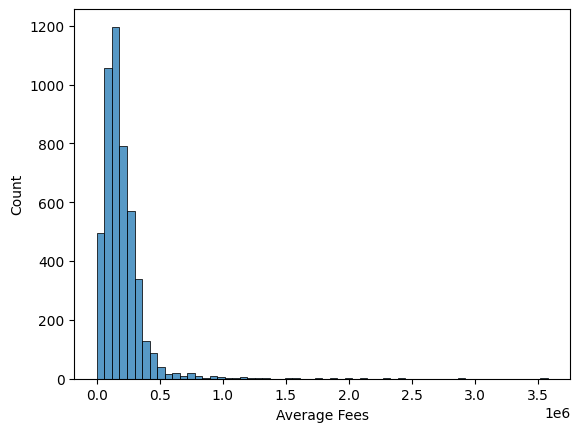

In [ ]:
sns.histplot(data=engg_colleges["Average Fees"], bins=60)

## Fill NaN values

In [ ]:
nit = []
for c in engg_colleges[engg_colleges['University'].isna() == True]['College Name'].to_list():
    if not pd.isna(c) and 'National Institute of Technology' in c:
        nit.append(c)
print(len(nit))

26


Add University fot BITS

In [ ]:
# Update BITS university
engg_colleges['University'].mask( ((engg_colleges['University'].isna() == True) & (
    (engg_colleges['College Name'].str.contains('Birla Institute of Technology')) | (
        engg_colleges['College Name'].str.contains('BITS Pilani'))
    )), 'BITS' , inplace=True )

In [ ]:
# Check if NITs have a univesity
nit = []
for c in engg_colleges[engg_colleges['University'].isna() == True]['College Name'].to_list():
    if 'National Institute of Technology' in c:
        nit.append(c)
print(len(nit))

26


In [ ]:
# Add university for NIT
engg_colleges['University'].mask( ((engg_colleges['University'].isna() == True) & (
    (engg_colleges['College Name'].str.contains('National Institute of Technology'))
    )), 'NIT' , inplace=True )

In [ ]:
# Check nif IITs have a university
iit = []
for c in engg_colleges[engg_colleges['University'].isna() == True]['College Name'].to_list():
    if 'Indian Institute of Technology' in c:
        print(c)
        iit.append(c)
len(iit)

Indian Institute of Technology Hyderabad 
Indian Institute of Technology Banaras Hindu University Varanasi 
Indian Institute of Technology Guwahati 
Indian Institute of Technology Indian School of Mines Dhanbad 
Indian Institute of Technology Indore 
Indian Institute of Technology Gandhinagar 
Indian Institute of Technology Ropar 
Indian Institute of Technology Bhubaneswar 
Indian Institute of Technology Patna 
Indian Institute of Technology Mandi 
Indian Institute of Technology Jodhpur 
Indian Institute of Technology Tirupati 
Indian Institute of Technology Palakkad 
Indian Institute of Technology Goa 
Indian Institute of Technology Bhilai 
Indian Institute of Technology Dharwad 
Indian Institute of Technology Jammu 


17

In [ ]:
# Add university to IITs
engg_colleges['University'].mask( ((engg_colleges['University'].isna() == True) & (
    (engg_colleges['College Name'].str.contains('Indian Institute of Technology'))
    )), 'IIT' , inplace=True )

In [ ]:
# Some universities are colleges too, find these university with same college name
uni = []
present_in_uni = []
all_uni = list(engg_colleges[engg_colleges['University'].isna() == False]['University'].unique())
college_uni_map = {}
for c in engg_colleges[engg_colleges['University'].isna() == True]['College Name'].to_list():
    if 'university' in c.lower():
        uni.append(c)
        for uni_a in all_uni:
            if c.lower() in uni_a.lower():
                present_in_uni.append(c)
                college_uni_map[c] = uni_a

print(len(uni))
print(len(present_in_uni))

290
111


In [ ]:
# add same universty which have same college name as university
for col, value in college_uni_map.items():
    engg_colleges['University'].mask( ((engg_colleges['University'].isna() == True) & (
    (engg_colleges['College Name'] == col)
    )), value, inplace=True )

In [ ]:
engg_colleges[(engg_colleges['College Name'] == 'Savitribai Phule Pune University')]

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
47,Savitribai Phule Pune University,Co-Ed,411.0,8185.0,686.0,1949.0,3.6,"Savitribai Phule Pune University, Pune","BA, B.Com, B.Com, BA, BA, B.Com, B.Com, B.Com,...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Pune,Maharashtra,India,Public/Government,268075.681818


In [ ]:
# other collges which does not have university are  Autonomous - Assumption - tested for some data
engg_colleges['University'].fillna('Autonomous', inplace=True)

In [ ]:
# update ratigs with mean of university
engg_colleges['Rating'] = engg_colleges.groupby('University')['Rating'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-79-ece7a517bee8>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  engg_colleges['Rating'] = engg_colleges.groupby('University')['Rating'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
engg_colleges['Rating'].fillna(engg_colleges['Rating'].median(), inplace = True)

In [ ]:
engg_colleges['Rating'].isna().sum()

0

In [ ]:
# update Total Faculty with mean of university
engg_colleges['Total Faculty'] = engg_colleges.groupby('University')['Total Faculty'].apply(lambda x: x.fillna(x.mean()))
engg_colleges['Total Faculty'].fillna(engg_colleges['Total Faculty'].median(), inplace = True)

<ipython-input-82-b94b5e889cf3>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  engg_colleges['Total Faculty'] = engg_colleges.groupby('University')['Total Faculty'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
# update Total Total Student Enrollments with mean of university
engg_colleges['Total Student Enrollments'] = engg_colleges.groupby('University')['Total Student Enrollments'].apply(lambda x: x.fillna(x.mean()))
engg_colleges['Total Student Enrollments'].fillna(engg_colleges['Total Student Enrollments'].median(), inplace = True)

<ipython-input-83-3e90fb0035aa>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  engg_colleges['Total Student Enrollments'] = engg_colleges.groupby('University')['Total Student Enrollments'].apply(lambda x: x.fillna(x.mean()))


<ipython-input-84-f9ddb41893f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(engg_colleges.corr(), annot=True, cmap='coolwarm')


<Axes: >

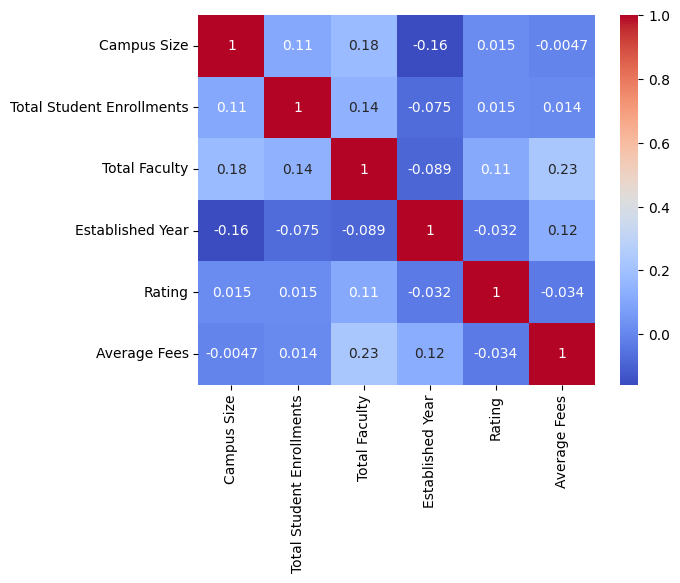

In [ ]:
# create heatmap of correlation matrix
sns.heatmap(engg_colleges.corr(), annot=True, cmap='coolwarm')

In [ ]:
# udpate Facilities NaN values with Not Specified
engg_colleges['Facilities'].fillna("Not Specified", inplace = True)

In [ ]:
engg_colleges['Established Year'].fillna(engg_colleges['Established Year'].median(), inplace = True)

In [ ]:
engg_colleges['College Type'] = engg_colleges['College Type'].fillna('Private')

In [ ]:
engg_colleges.isna().sum()

College Name                    0
Genders Accepted                0
Campus Size                  2458
Total Student Enrollments       0
Total Faculty                   0
Established Year                0
Rating                          0
University                      0
Courses                         0
Facilities                      0
City                            0
State                           0
Country                         0
College Type                    0
Average Fees                    0
dtype: int64

In [ ]:
degrees = ['b.tech', 'm.sc', 'm.tech', 'ma', 'ph.d', 'mba', 'b.arch', 'b.a', 'b.com',
 'b.des', 'b.e', 'b.e/b.tech', 'b.ed', 'b.f.sc', 'b.f.tech', 'b.lib.i.sc',
 'b.lib.sc', 'b.lit', 'b.optom', 'b.optometry', 'b.p.ed', 'b.pharm', 'b.pharma',
 'b.plan', 'b.sc', 'b.sc-', 'b.sc-biotechnology', 'b.sc-botany', 'b.sc-chemistry',
 'b.sc-computer', 'b.sc-economics', 'b.sc-geology', 'b.sc-industrial', 'b.sc-life',
 'b.sc-mathematics', 'b.sc-maths', 'b.sc-mobile', 'b.sc-physical', 'b.sc-physics',
 'b.sc-zoology', 'b.t.c', 'b.v.sc', 'b.voc', 'ba','ba-',  'ba-communication',
 'ba-drawing', 'ba-economics', 'ba-education', 'ba-english', 'ba-geography', 'ba-hindi',
 'ba-history', 'ba-manipuri', 'ba-mathematics', 'ba-optional', 'ba-performing',
 'ba-political', 'ba-public', 'ba-social', 'ba-theatre', 'bachelor', 'bam', 'bba', 'bbm',
 'bca', 'bcs', 'be', 'bfa', 'bfd', 'bhm', 'bhmct', 'bid', 'bio', 'bjmc', 'bls', 'bm', 'bmc',
 'bmm', 'bms', 'bmt', 'bnys', 'bpa', 'bpt', 'bs', 'bsl', 'bsw', 'bva', 'd.ed', 'd.el.ed', 'd.litt',
 'd.pharma', 'd.voc', 'diploma', 'dm', 'dmlt', 'dnb', 'dpt', 'dva', 'llb', 'llm', 'm.', 'm.arch',
 'm.ch', 'm.com', 'm.com-economic', 'm.comself', 'm.des', 'm.e', 'm.ed', 'm.f.sc', 'm.f.tech', 'm.lib.i.sc',
 'm.mus', 'm.optom', 'm.p.ed', 'm.pharma', 'm.phil', 'm.plan', 'm.sc.', 'm.sc.ed',
 'm.v.sc', 'm.voc', 'master', 'masters', 'mbm', 'mca', 'md', 'mds', 'me', 'mfa', 'mfc',
 'mjmc', 'mmc', 'mms', 'mot', 'mpa', 'mph', 'mpt', 'ms', 'msw', 'mva', 'pg', 'pgd', 'pgdba',
 'pgdca', 'pgdm', 'pgp', 'pgpm', 'pharm.d', 'pharma.d', 'fellowship', 'p.hd', 'post.doctoral.fellowship']
course_repalce_dict = {
    'b. sc': 'b.sc',
    'executive mba': 'executive.mba',
    'post graduate diploma': 'pgd',
    'post b.sc': 'm.sc',
    'post diploma': 'pd',
    'b. pharma': 'b.pharma',
    'b.pharm': 'b.pharma',
    'b.pharmaa': 'b.pharma',
    'advanced diploma': 'diploma',
    'advanced pgd': 'pgd',
    'b a': 'b.a',
    'b. com': 'b.com',
    'b. tech': 'b.tech',
    'b.tech.': 'b.tech',
    'm.tech.': 'm.tech',
    'm.teh': 'm.tech',
    'b. ed': 'b.ed',
    'mba.': 'mba',
    'msc.': 'm.sc',
    'ph.d.': 'ph.d',
    'b pharma': 'b.pharma',
    'b. arch': 'b.arch',
    'post doctoral fellowship': 'post.doctoral.fellowship',
    'b.sc.': 'b.sc',
    'm.a.': 'm.a',
    'ba- history': 'ba-history'
}
change_first_words = {
    'b.sc-': 'b.sc',
    'm.sc.': 'm.sc'
}
degrees = list(set(degrees + list(course_repalce_dict.values())))

In [ ]:
courses = engg_colleges['Courses'].to_list()
unique_courses = set()
test = {}

for row in courses:
    for course in row.split(','):
        course = course.lower()
        for to_replace in course_repalce_dict:
            course = course.replace(to_replace.lower(), course_repalce_dict [to_replace].lower())
        course = course.lower().strip().split()
        if course[0] in degrees:
            continue
        # print(course)
        # tokenised_c = word_tokenize(course)
        if len(course) > 1:
            course_first = course[0]
            if course_first in ['advance', 'advanced', 'in']:
                course_first = course[1]
            # print(course_first)
            unique_courses.add(course_first)
            test[' '.join(course)] = course_first
print(len(unique_courses))

113


In [ ]:
print(sorted(list(unique_courses)))

['aeronautical', 'and', 'anthropology', 'automation', 'automobile', 'baccalaureate', 'biochemistry', 'biology', 'biotechnology', 'botany', 'catering', 'chemical', 'chemistry', 'civil', 'computer', 'continuing', 'control', 'cs', 'culture', 'defence', 'diagnosis', 'diploma', 'drawing', 'economics', 'electical', 'electrical', 'electronic', 'electronics', 'embedded', 'emergency', 'english', 'entertainment', 'ethics', 'events', 'executive', 'fellowship', 'finance', 'financial', 'fitness', 'food', 'forensic', 'general', 'genetics', 'geography', 'geology', 'german', 'graduate', 'graphics', 'gynaecology', 'health', 'high', 'hindi', 'history', 'hospitality', 'income', 'indian', 'industrial', 'information', 'instrumentation', 'insurance', 'integrated', 'journalism', 'kannada', 'karmakand', 'law', 'literature', 'machine', 'manipuri', 'marine', 'mathametics', 'mathematics', 'maths', 'mechanacial', 'mechanical', 'media', 'microbiology', 'mobility', 'music', 'nutrition', 'ocean', 'optional', 'peace'

Will drop unique cources as it womn't be considered

In [ ]:
def get_courses(row):
    unique_courses = set()
    for course in row.split(','):
        course = course.lower()
        for to_replace in course_repalce_dict:
            course = course.replace(to_replace.lower(), course_repalce_dict [to_replace].lower())
        course = course.lower().strip().split()
        if course[0] in degrees:
            unique_courses.add(course[0])
    
    return list(unique_courses)
engg_colleges['Courses_list'] = engg_colleges['Courses'].apply(get_courses)

In [ ]:
engg_colleges.columns

Index(['College Name', 'Genders Accepted', 'Campus Size',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees', 'Courses_list'],
      dtype='object')

In [ ]:
engg_colleges['Courses_list'].head()

0        [ph.d, b.tech, m.tech, b.arch, mba, ma, m.sc]
1                 [b.tech, m.tech, b.arch, ph.d, m.sc]
2             [b.tech, m.tech, bba, mba, master, ph.d]
3    [bhmct, diploma, b.pharma, mca, bca, b.tech, m...
4                   [ms, m.phil, b.tech, m.tech, ph.d]
Name: Courses_list, dtype: object

In [ ]:
facilities = engg_colleges['Facilities'].to_list()
unique_facilities = set()

for row in facilities:
    row = row.lower()
    for facility in row.split(','):
        unique_facilities.add(facility.strip())
print(len(unique_facilities))

21


In [ ]:
def facility_list(row):
    unique_facilities = set()
    row = row.lower()
    for facility in row.split(','):
        unique_facilities.add(facility.strip())
    return list(unique_facilities)
engg_colleges['Facilities_list'] = engg_colleges['Facilities'].apply(facility_list)

In [ ]:
engg_colleges['Facilities_list'].head()

0    [banks facilities, library, gym, it infrastruc...
1    [library, gym, auditorium, it infrastructure, ...
2    [library, gym, it infrastructure, alumni assoc...
3    [transport, banks facilities, library, gym, au...
4    [banks facilities, library, gym, it infrastruc...
Name: Facilities_list, dtype: object

In [ ]:
engg_colleges.to_csv('proccessed_indian_universities.csv')

In [ ]:
# Check filter/dropdown values
filter_columns = ['Genders Accepted', 'University', 'City', 'State', 'Country', 'College Type', 'Courses_list', 'Facilities_list']
filter_dict = {}
for col in filter_columns:
    filter_dict[col] = list(engg_colleges[col].explode().unique())

# write to JSON
import json
with open('filter_columns_data.json', 'w') as json_file:
    json.dump(filter_dict, json_file)

In [ ]:
prefix_dict = {
    'Courses_list': 'course_',
    'University': 'uni_',
    'City': 'city_',
    'State': 'state_',
    'College Type': 'ctype_',
    'Genders Accepted': 'gender_',
    'Facilities_list': 'facility_'
}
all_columns = ['Genders Accepted', 'Total Student Enrollments', 'Total Faculty',
       'Rating', 'University', 'City', 'State', 'Country', 'College Type',
       'Average Fees', 'Courses_list', 'Facilities_list']

test_json_params = {}
for col in all_columns:
    prefix = prefix_dict.get(col, '')
    if col in filter_dict:
        for value in filter_dict[col]:
            test_json_params[f'{prefix}{value}'] = 0
    else:
        test_json_params[f'{prefix}{col}'] = 0

# write to JSON
import json
with open('final_param_out.json', 'w') as json_file:
    json.dump(test_json_params, json_file)

In [ ]:
# create cascade dropdown values
uni_gb_states = engg_colleges.groupby('State')['University'].unique().apply(list).to_dict()
city_gb_states = engg_colleges.groupby('State')['City'].unique().apply(list).to_dict()

cascade_dropdown_values = {
    'University': uni_gb_states,
    'City': city_gb_states
}

import json
with open('cascade_dropdown_values.json', 'w') as json_file:
    json.dump(cascade_dropdown_values, json_file)

In [ ]:
# Apply one-hot encoding on the list in the row
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Facilities_list'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'facility_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-102-041be45e9c7f>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Facilities_list'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
engg_colleges.columns

Index(['College Name', 'Genders Accepted', 'Campus Size',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees', 'Courses_list',
       'Facilities_list', 'facility_alumni associations',
       'facility_auditorium', 'facility_banks facilities',
       'facility_boys hostel', 'facility_cafeteria', 'facility_classrooms',
       'facility_convenience store', 'facility_girls hostel',
       'facility_guest room', 'facility_gym', 'facility_it infrastructure',
       'facility_laboratories', 'facility_library',
       'facility_medical/hospital', 'facility_moot court',
       'facility_not specified', 'facility_parking facility',
       'facility_sports', 'facility_swimming pool', 'facility_transport',
       'facility_wifi'],
      dtype='object')

In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Courses_list'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'course_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-104-861599e3efdd>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Courses_list'].apply(pd.Series).stack()).sum(level=0)], axis=1)
<ipython-input-104-861599e3efdd>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Courses_list'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
#engg_colleges_train = engg_colleges.drop(['College Name', 'Campus Size', 'Total Faculty', 'Established Year', 'Courses', 'Facilities', 'Country'], axis = 1)

In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['University'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'uni_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-107-671e43e81327>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['University'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['City'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'city_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-109-25b9d21839a0>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['City'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['State'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'state_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-110-191726a9f02d>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['State'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['College Type'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'ctype_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-111-1828ff4f243e>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['College Type'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
college_before = list(engg_colleges.columns)
engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Genders Accepted'].apply(pd.Series).stack()).sum(level=0)], axis=1)
engg_colleges.columns = [f'gender_{i}' if i not in college_before else f'{i}' for i in engg_colleges.columns]

<ipython-input-112-62833e7ba769>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  engg_colleges = pd.concat([engg_colleges, pd.get_dummies(engg_colleges['Genders Accepted'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [ ]:
engg_colleges.head()

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,...,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,ctype_Private,ctype_Public/Government,gender_Co-Ed,gender_Female,gender_Male
0,National Institute of Technology Rourkela,Co-Ed,647.0,4811.0,329.0,2007.0,3.120000,NIT,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",...,0,0,0,0,0,0,1,1,0,0
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215.0,1071.0,192.0,2007.0,2.730000,NIT,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",...,0,0,0,0,0,0,1,1,0,0
2,Netaji Subhas University of Technology,Co-Ed,145.0,3759.0,101.0,2018.0,3.056196,Autonomous,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",...,0,0,0,0,0,0,1,1,0,0
3,Birla Institute of Technology,Co-Ed,980.0,4506.0,284.0,1955.0,3.056196,BITS,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",...,0,0,0,0,0,1,0,1,0,0
4,International Institute of Information Technology,Co-Ed,66.0,1721.0,85.0,2001.0,3.050000,Autonomous,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",...,1,0,0,0,0,1,0,1,0,0


In [ ]:
engg_colleges_train = engg_colleges.drop(['College Name','Campus Size', 'Total Faculty', 'Established Year', 'Courses', 'Facilities', 'Country','Genders Accepted', 'University',
                                                'City', 'State', 'College Type', 'Courses_list', 'Facilities_list'],
                                               axis = 1)

In [ ]:
colleges = engg_colleges_train.fillna(0)


In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
#from fuzzywuzzy import fuzz
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pickle
from sklearn.decomposition import PCA


In [ ]:
pca1 = PCA(n_components=2, svd_solver='full')
colleges1 = pca1.fit_transform(colleges)

In [ ]:
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(colleges1)


NearestNeighbors(algorithm='brute')

In [ ]:
knnPickle1 = open('knnpickle_file1', 'wb') 

pickle.dump(neigh, knnPickle1)  

knnPickle1.close()


In [ ]:
loaded_model = pickle.load(open('knnpickle_file1', 'rb'))


In [ ]:
trial = colleges1[1].reshape(1, -1)

distances, indices = loaded_model.kneighbors(trial) 
indices

array([[   1,  678, 1629, 2116, 2505]])

In [ ]:
print(engg_colleges['College Name'][indices])